## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [3]:
survival_counts = dataset[['Sex', 'Survived']].groupby('Sex').sum()
survival_procent = (survival_counts['Survived'] / dataset['Sex'].value_counts()) * 100
survival_procent = survival_procent.apply(lambda x: str(x) + '%')

result = pd.DataFrame(survival_procent, columns=['Survival Procent'])
result

,Survival Procent
Sex,
female,74.20382165605095%
male,18.890814558058924%


**Задача 2:** Відтворіть ці графіки  
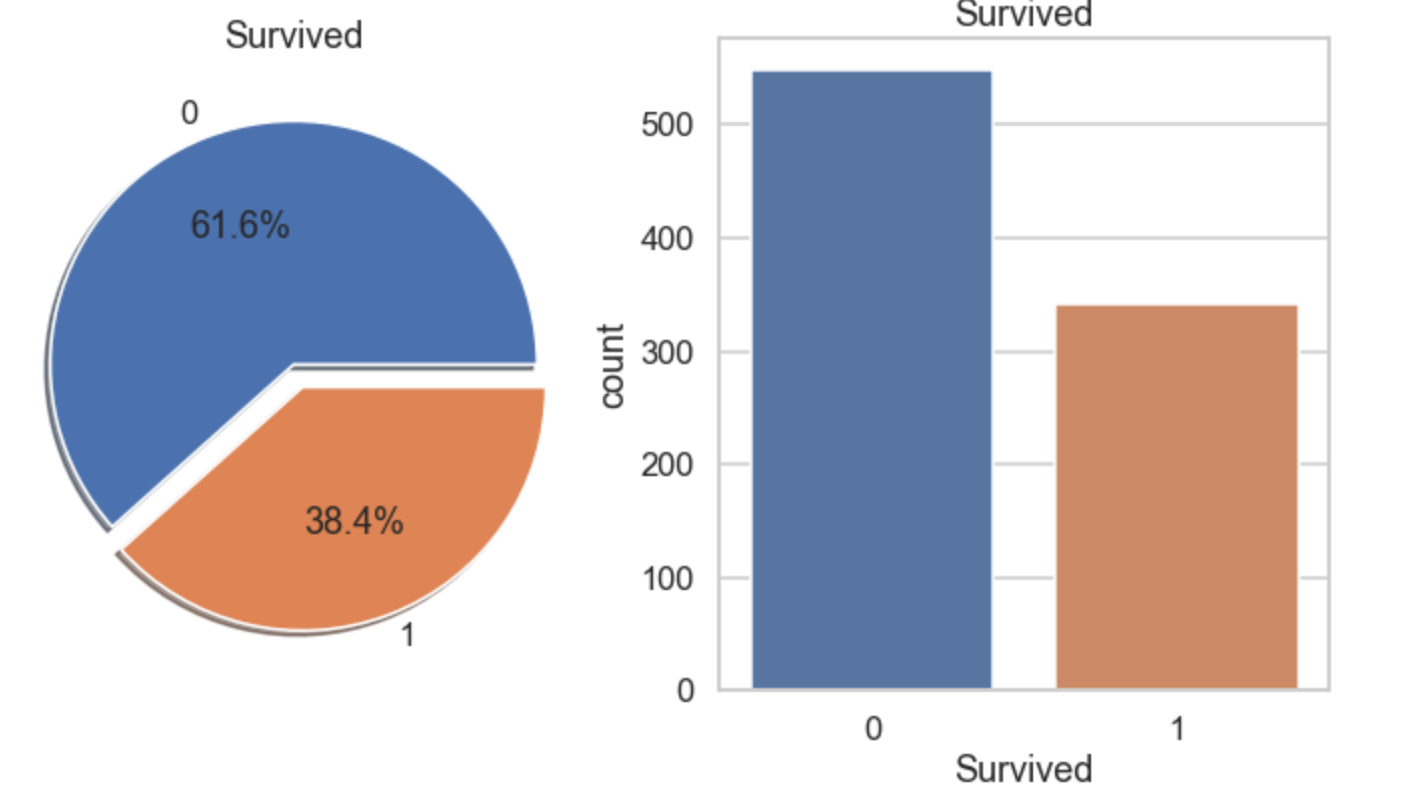


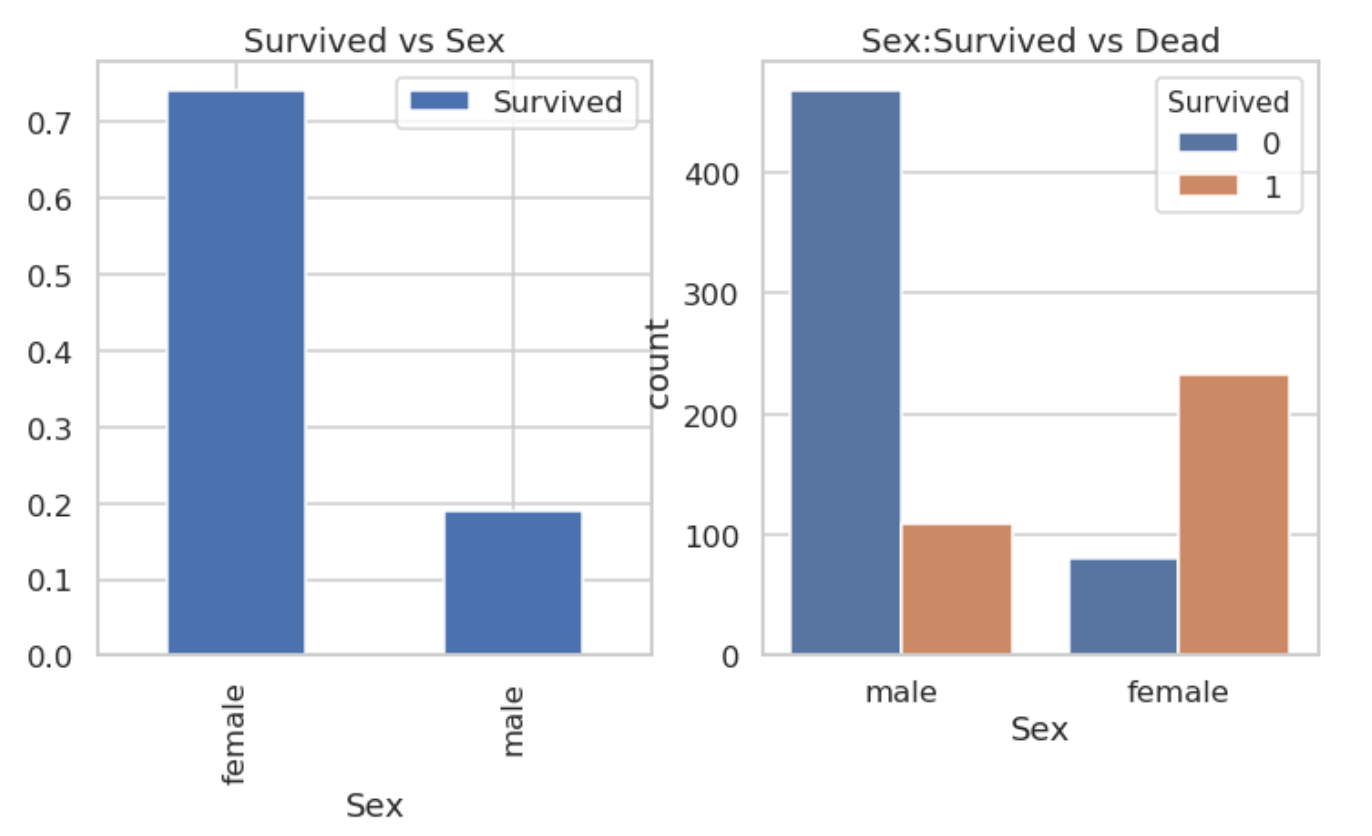

C:\Users\user\AppData\Local\Temp\ipykernel_1772\2650206633.py:21: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=surv_value, x = "Survived" , y = "Count" , ax=ax_bar_value, hue="Survived" , palette=palette_color)
C:\Users\user\AppData\Local\Temp\ipykernel_1772\2650206633.py:42: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=surv_and_dead,x = "Sex" , y = "Count" , ax = ax_sex_surv_vs_dead, palette=palette_color, hue = "Survived" , dodge = True )


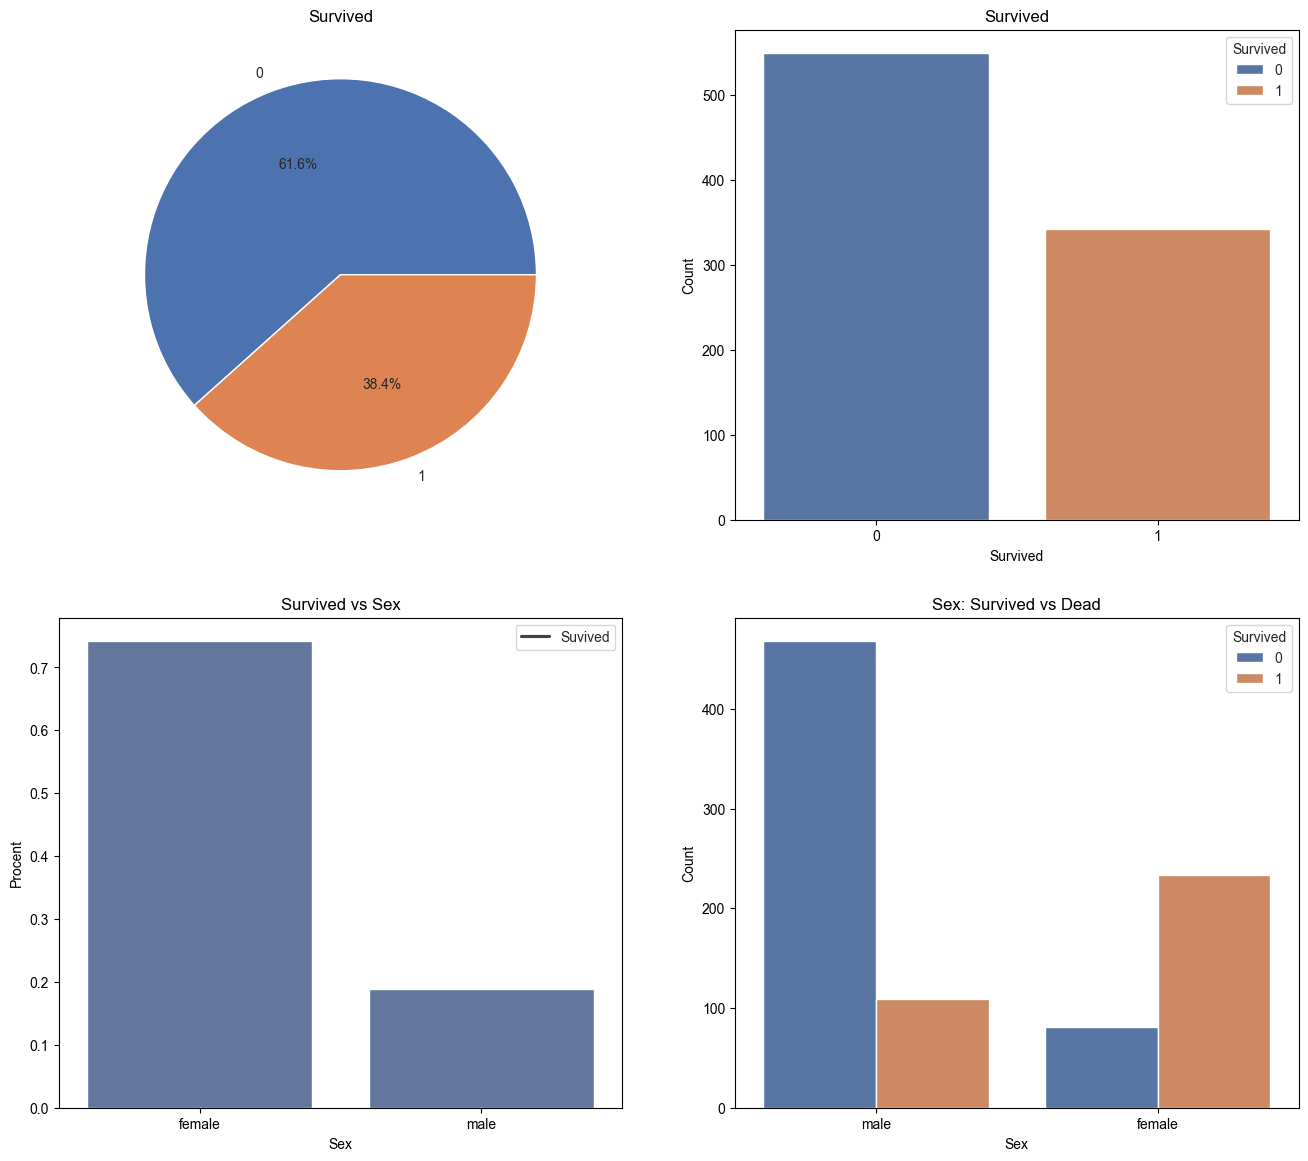

In [4]:
fig, ((ax_pie_surv,ax_bar_value),(ax_surv_vs_sex, ax_sex_surv_vs_dead)) = plt.subplots(2,2,figsize = (16,14))
data_survived = dataset['Survived']
all_passanger_info_surv = data_survived.value_counts()
len_of_peoples = len(data_survived)

palette_color = sns.color_palette('deep')  
sns.set_style('whitegrid')



surv_procent = (all_passanger_info_surv[0] / len_of_peoples) * 100
die_procent = (all_passanger_info_surv[1] / len_of_peoples) *100

surv_rating = pd.DataFrame({'Survived': [0,1], 'Procent': [surv_procent, die_procent]})
ax_pie_surv.pie(surv_rating['Procent'], labels=surv_rating['Survived'],autopct='%1.1f%%', colors= palette_color)
ax_pie_surv.set_title("Survived")



surv_value = pd.DataFrame({'Count': [all_passanger_info_surv[0], all_passanger_info_surv[1]], 'Survived': [0, 1]})
sns.barplot(data=surv_value, x = "Survived" , y = "Count" , ax=ax_bar_value, hue="Survived" , palette=palette_color)
ax_bar_value.set_title("Survived")



all_people = dataset[["Sex", "Survived"]]
surv_women = all_people.value_counts()["female"][1]
surv_men = all_people.value_counts()["male"][1]
dead_women = all_people.value_counts()["female"][0]
dead_men = all_people.value_counts()["male"][0]
all_women = len(all_people[all_people['Sex'] == 'female'])
all_men = len(all_people[all_people['Sex'] == 'male'])

surv_vs_sex = pd.DataFrame({'Sex': ['female', 'male'], 'Procent': [(surv_women / all_women), (surv_men / all_men)]})
sns.barplot(data=surv_vs_sex, x = "Sex", y = "Procent" , ax = ax_surv_vs_sex  ,color='#5975a4', legend=True)
ax_surv_vs_sex.legend({'Suvived'})
ax_surv_vs_sex.set_title("Survived vs Sex")



surv_and_dead = pd.DataFrame({'Sex': ['male', 'female', 'male', 'female'], 'Survived': [1, 1, 0, 0], 'Count': [surv_men, surv_women, dead_men, dead_women]})
sns.barplot(data=surv_and_dead,x = "Sex" , y = "Count" , ax = ax_sex_surv_vs_dead, palette=palette_color, hue = "Survived" , dodge = True )
ax_sex_surv_vs_dead.set_title("Sex: Survived vs Dead")

plt.show()

Прокоментуйте побудовані графіки
1. Графік показує нам скільки відсотків людей загинуло і скільки вижило з усіх пасажирів
2. Графік показує нам скільки у числовому плані загинуло людей і вижило з усіх пасажирів
3. Графік показує співвідношення кількості виживших жінок до виживших чоловіків
4. Графік показує нам скільки у числовому плані вижило і загинуло людей серед жінок і чоловіків 

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [5]:
miss_values = dataset.isnull().sum()
miss_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [6]:
most_popular_male_name = dataset.loc[dataset["Sex"] == 'male', ["Name"]]
most_popular_male_name.to_csv('./most_popular_male_name.cvs', sep=',', index=False,encoding= "utf-8")

with open('./most_popular_male_name.cvs',"r") as f:
    processed_name = []
    data_list = f.read().splitlines()
    for line in data_list:
        full_name = re.search(r"(\..+)",line)
        if full_name:
            full_name = full_name.group(1)[2:]
            punctuation_list = [',','.',':',';','!','?',"'",'"']
            for p in punctuation_list:
                if p in full_name:
                    full_name = full_name.replace(p,"")
            name = full_name.split()
            for i in name:
                processed_name.append(i)
        
most_popular_male_name = pd.DataFrame({"Male name":processed_name})
most_popular_male_name.value_counts().nlargest(3)

Male name
William      48
John         36
Henry        28
Name: count, dtype: int64

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [7]:
df_women_full_names = dataset.loc[dataset["Sex"] == 'female', ["Name"]]
df_women_full_names.to_csv('./most_popular_female_name.cvs', sep=',', index=False, encoding='utf-8')

with open('./most_popular_female_name.cvs', "r") as f:
    processed_names = []
    data_list = f.read().splitlines()
    for line in data_list:
        is_husband_name = re.search(r"(\(.+\))", line)
        if is_husband_name:
            name = re.search(r"(\([A-Z][a-z]+)", line)
            if name:
                processed_names.append(name.group(1)[1:])
        else:
            name = re.search(r"(\.\s[A-Z][a-z]+)", line)
            if name:
                processed_names.append(name.group(1)[2:])

df_women_first_names = pd.DataFrame({"Female name": processed_names})
df_women_first_names.value_counts().nlargest(3)


Female name
Anna           15
Mary           14
Elizabeth      11
Name: count, dtype: int64

**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
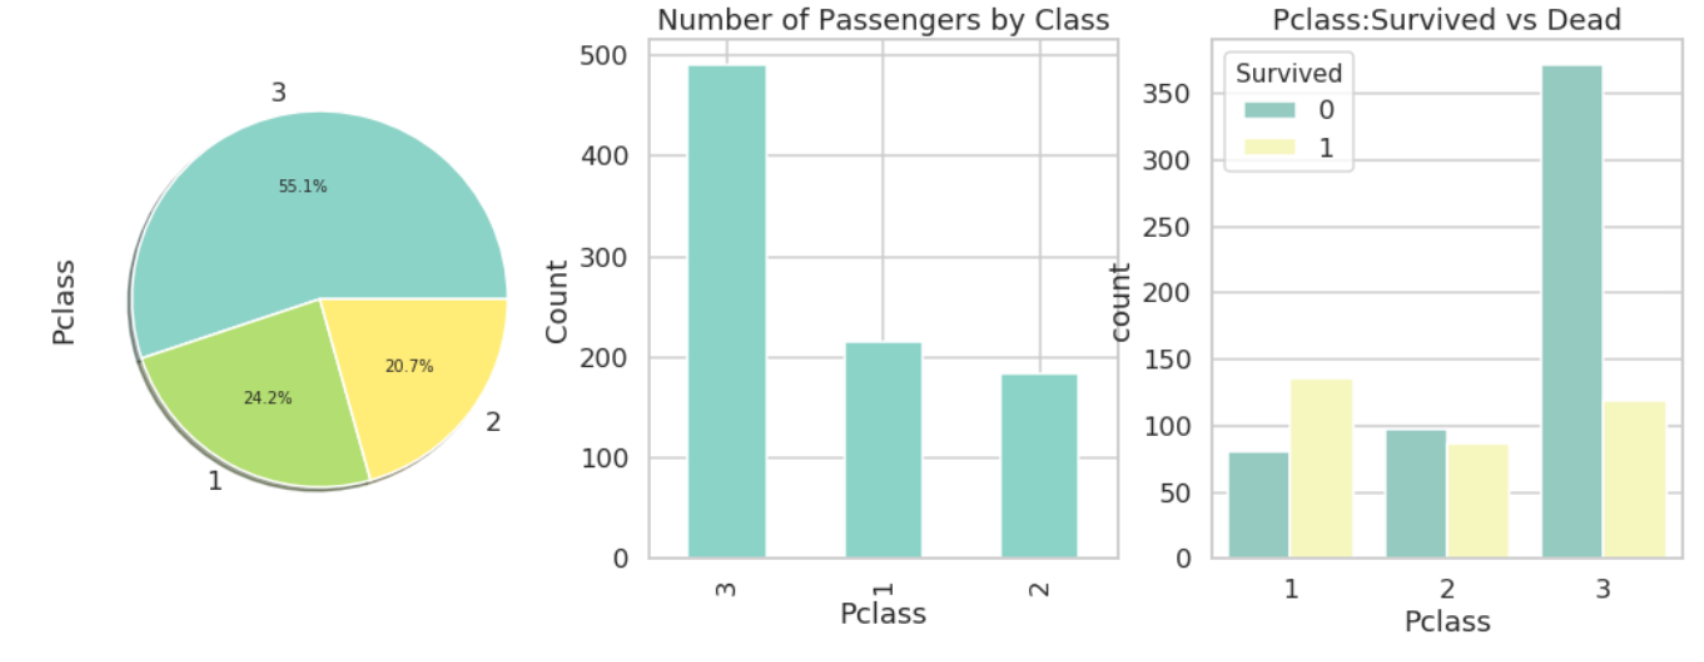

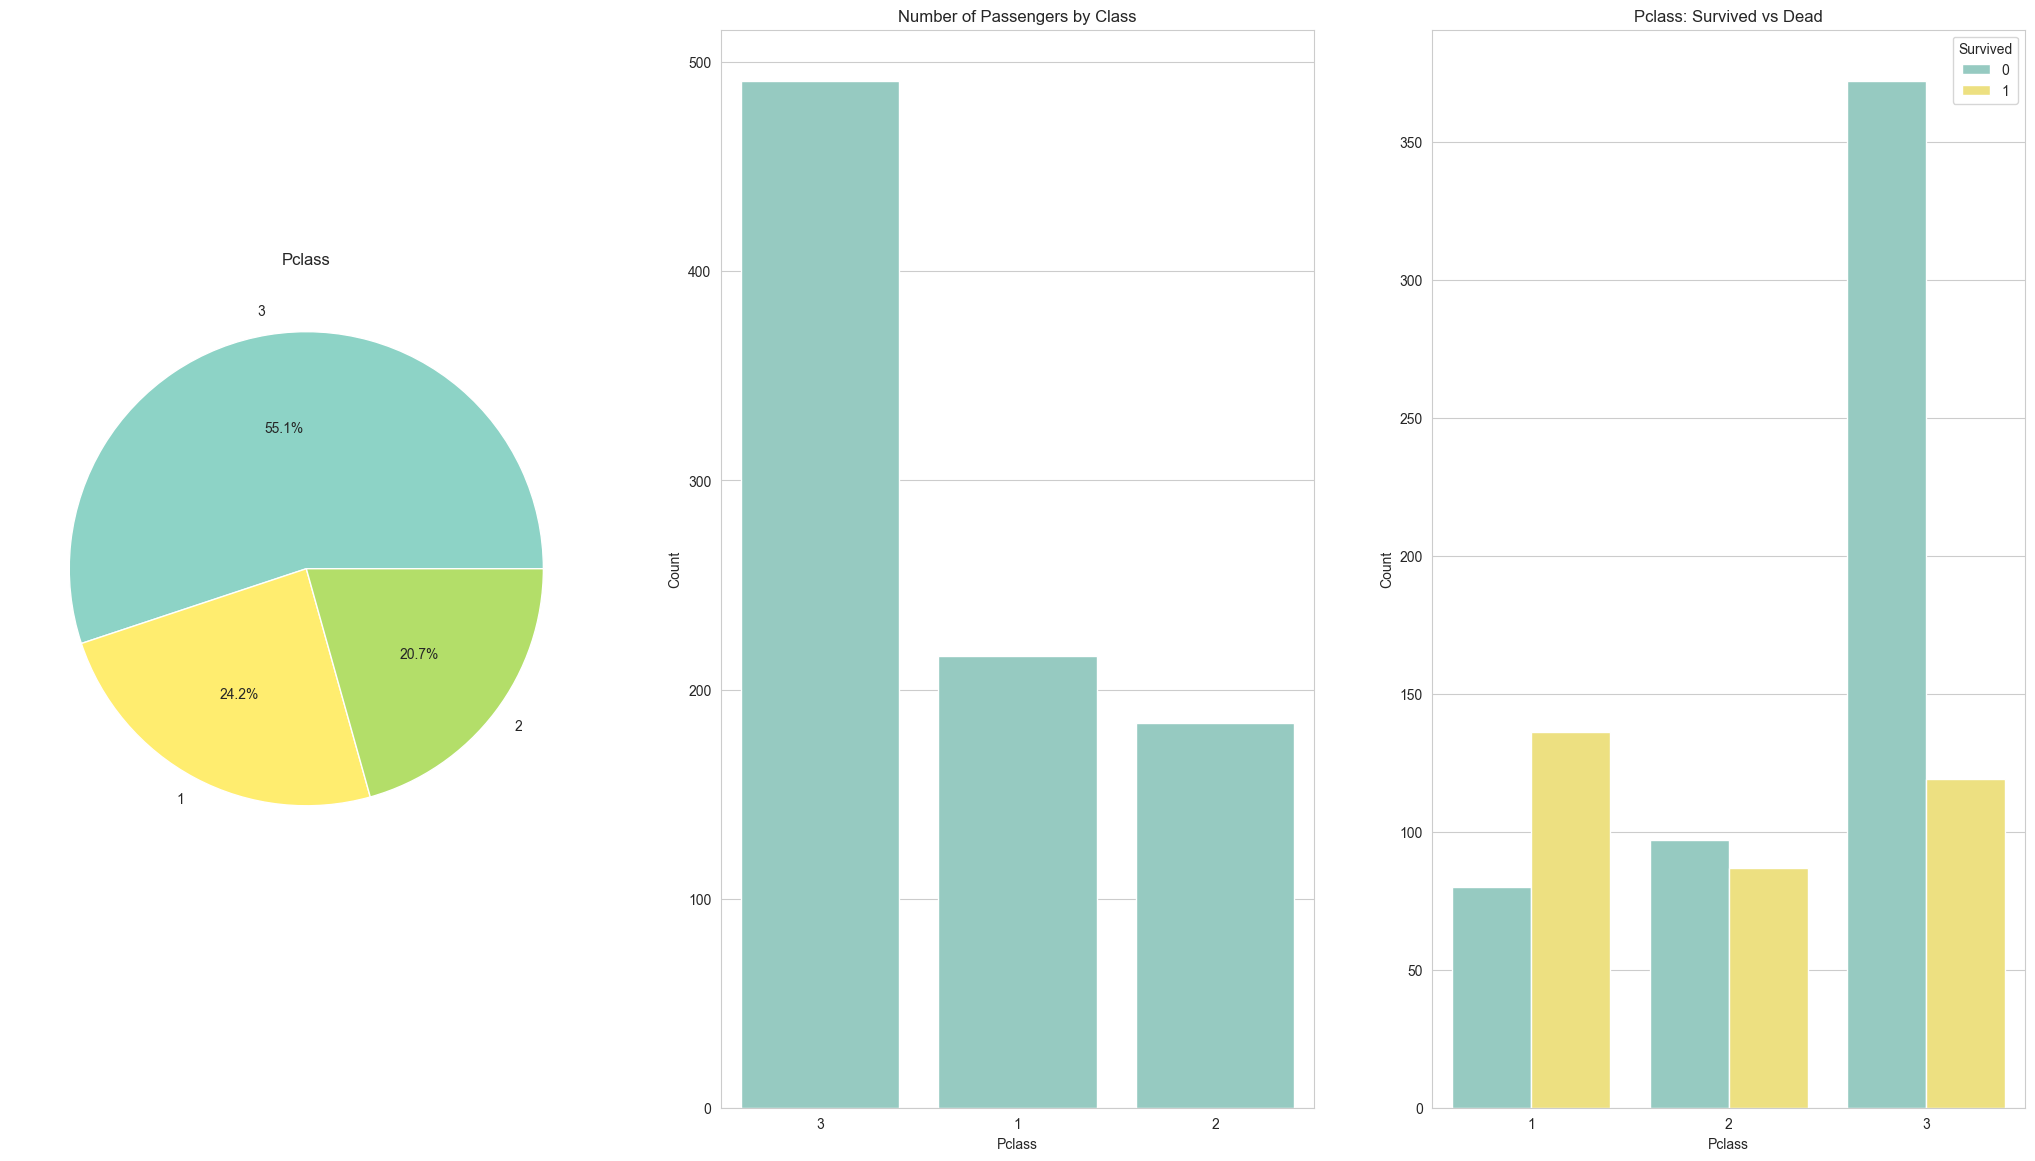

In [8]:
fig, ((ax_pclass, ax_pclass_value, ax_vs_pclass)) = plt.subplots(1,3, figsize=(26, 14))
type_pclass = dataset[['Pclass']]
sns.set_style('whitegrid')


pclass_rate = (type_pclass['Pclass'].value_counts() / len(type_pclass)) * 100
data_pclass_rates = pd.DataFrame({"Pclass": pclass_rate.index, "Percentage": pclass_rate.values})

ax_pclass.pie(data_pclass_rates["Percentage"], labels=data_pclass_rates['Pclass'], autopct='%1.1f%%', colors=['#8dd3c6', '#ffed6f', '#b3de69'])
ax_pclass.set_title("Pclass")



pclass_count = type_pclass["Pclass"].value_counts()
data_pclass_count = pd.DataFrame({"Pclass": pclass_count.index, "Count": pclass_count.values})

sns.barplot(data = data_pclass_count, x = "Pclass", y = "Count", ax=ax_pclass_value, color='#8dd3c6', order=data_pclass_count.sort_values("Count", ascending=False).Pclass)
ax_pclass_value.set_title("Number of Passengers by Class")



data_pclass_survival = dataset[["Pclass", "Survived"]]

pclass_survival_count = data_pclass_survival.groupby("Survived")["Pclass"].value_counts()
df_pclass_survival_count = pd.DataFrame({"Survived": pclass_survival_count.index.get_level_values("Survived"), "Pclass": pclass_survival_count.index.get_level_values("Pclass"), "Count": pclass_survival_count.values})

sns.barplot(data = df_pclass_survival_count, x = "Pclass", y = "Count", ax=ax_vs_pclass, palette=['#8dd3c6', '#ffed6f'], hue="Survived")
ax_vs_pclass.set_title("Pclass: Survived vs Dead")

plt.show()

Прокоментуйте побудовані графіки
1. Графік показує нам відсоток скільки пасажирів купували квиток певного класу
2. Графік показує нам в числовому плані скільки пасажирів купили квиток певного класу
3. Графік показує нам в числовому плані скільки людей загинуло або вижило в залежності від їхнього типу квитка

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
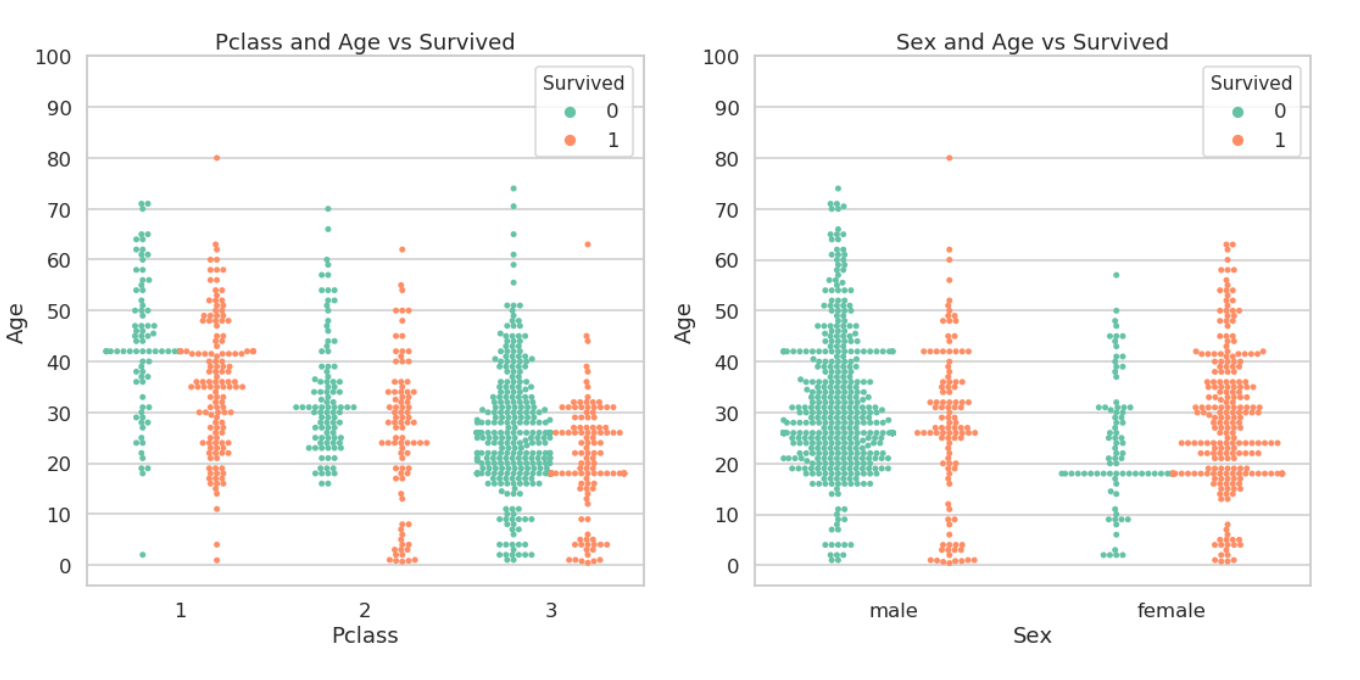![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

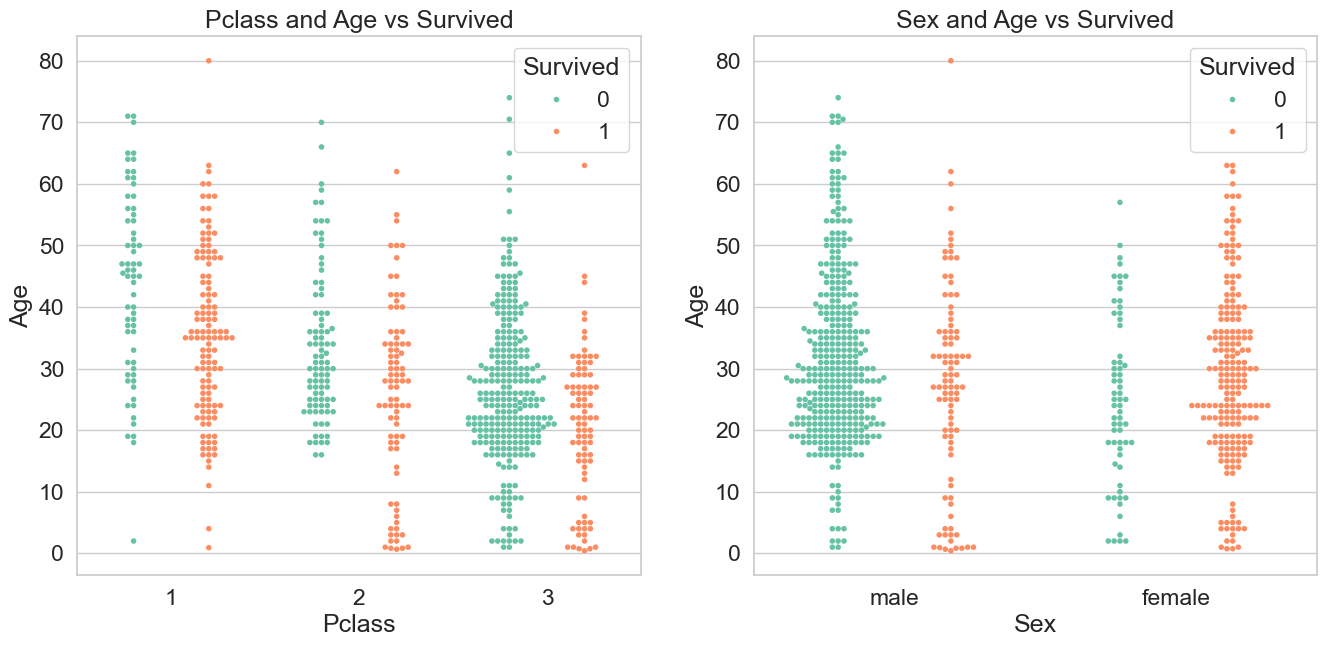

In [15]:
fig, (ax_sw_plot_PA, ax_sw_plot_SA) = plt.subplots(1,2, figsize=(16, 7))
sns.set_style('whitegrid')

data_pclass_age_survived = dataset[["Pclass", "Age", "Survived"]]
data_sex_age_survived = dataset[["Sex", "Age", "Survived"]]


sns.swarmplot(data=data_pclass_age_survived, x="Pclass", y="Age", hue="Survived", dodge=True, ax=ax_sw_plot_PA, size=4, palette=['#65c2a5', '#fc8d62'])
ax_sw_plot_PA.set_title("Pclass and Age vs Survived")



sns.swarmplot(data=data_sex_age_survived, x="Sex", y="Age", hue="Survived", dodge=True, ax=ax_sw_plot_SA, size=4, palette=['#65c2a5', '#fc8d62'])
ax_sw_plot_SA.set_title("Sex and Age vs Survived")

plt.show()

Прокоментуйте побудовані графіки
1. Графік показує вік пасажирів які загинули або вижили в залежності від їхнього типу квитка
2. Графік показує вік пасажирів які загинули або вижили в залежності від їньої статі

**Задача 8** Побудуйте наступні діаграми розподілів:  

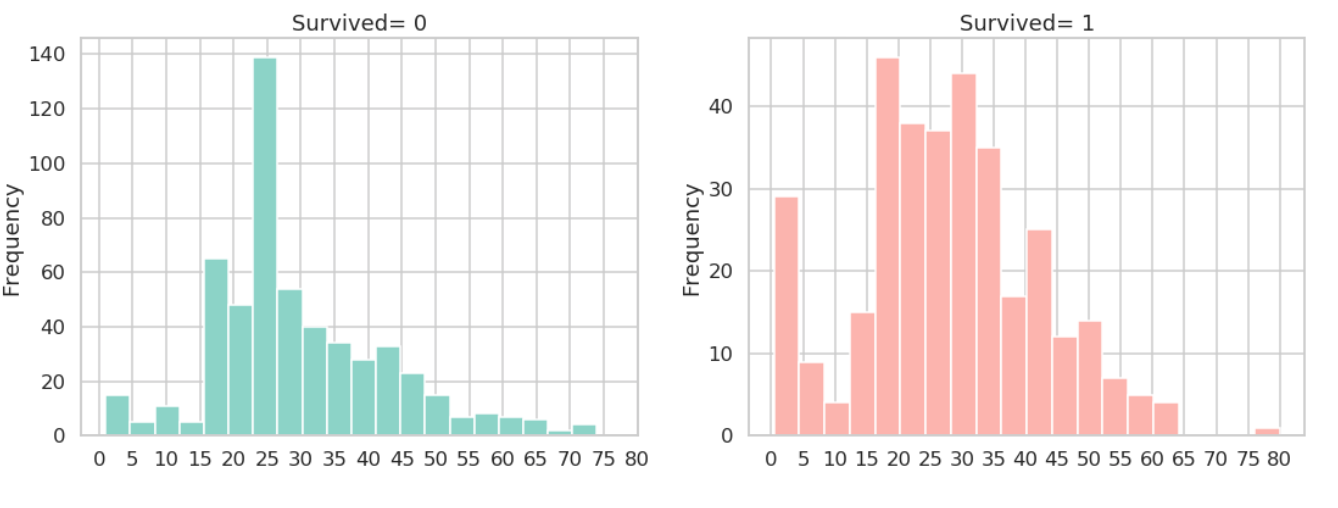



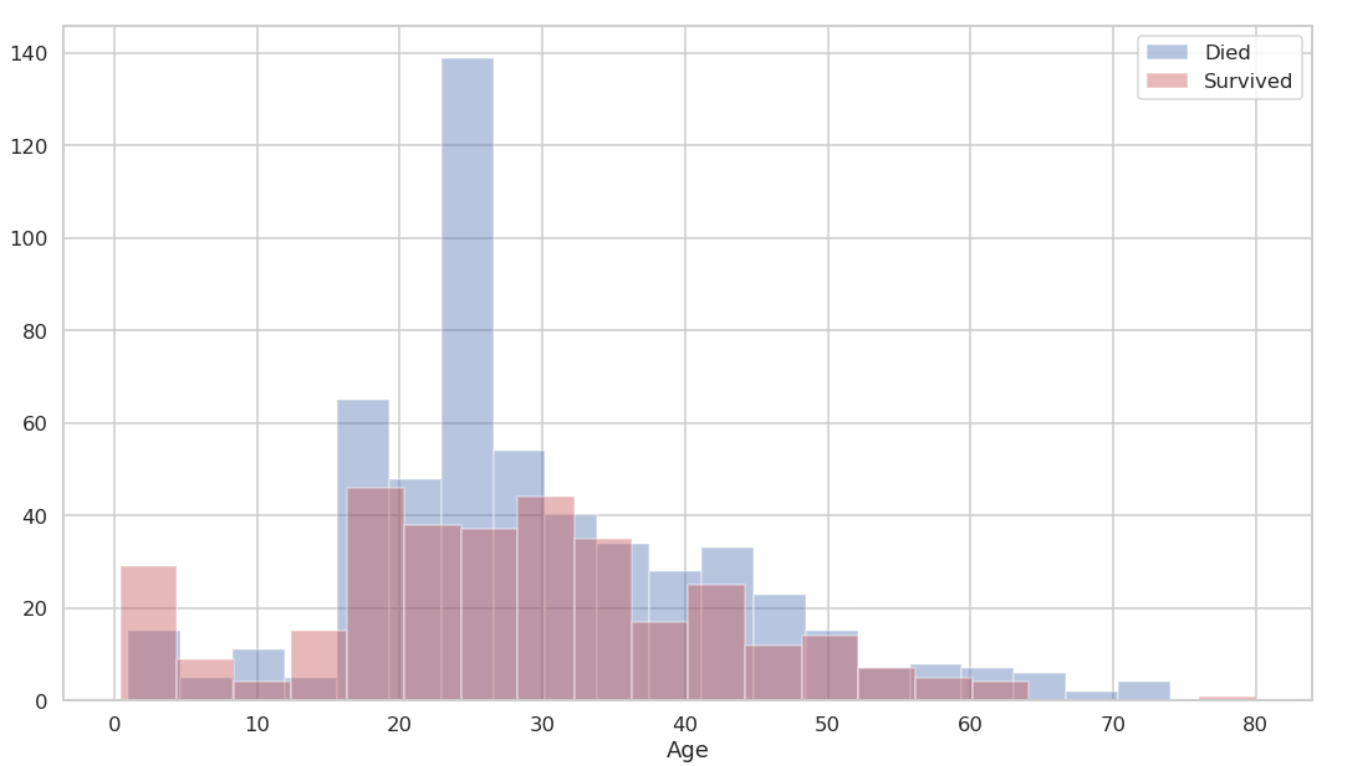

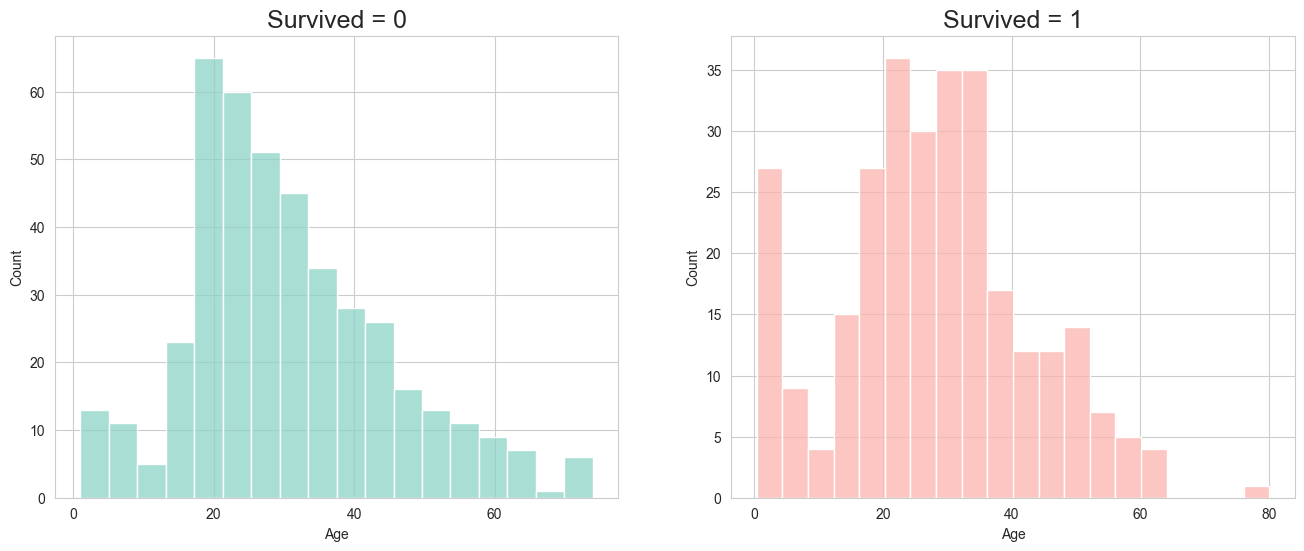

In [10]:
data_surv_age = dataset.loc[dataset["Survived"] == 1, ["Age"]]
data_died_age = dataset.loc[dataset["Survived"] == 0, ["Age"]]
sns.set_style('whitegrid')

fig, (ax_surv_0, ax_surv_1) = plt.subplots(1,2, figsize=(16, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.histplot(data=data_died_age, x="Age", ax=ax_surv_0, color='#8dd3c6' ,binwidth=4)
ax_surv_0.set_title("Survived = 0")

sns.histplot(data=data_surv_age, x="Age", ax=ax_surv_1, color='#fbb4ae', binwidth=4)
ax_surv_1.set_title("Survived = 1")

plt.show()


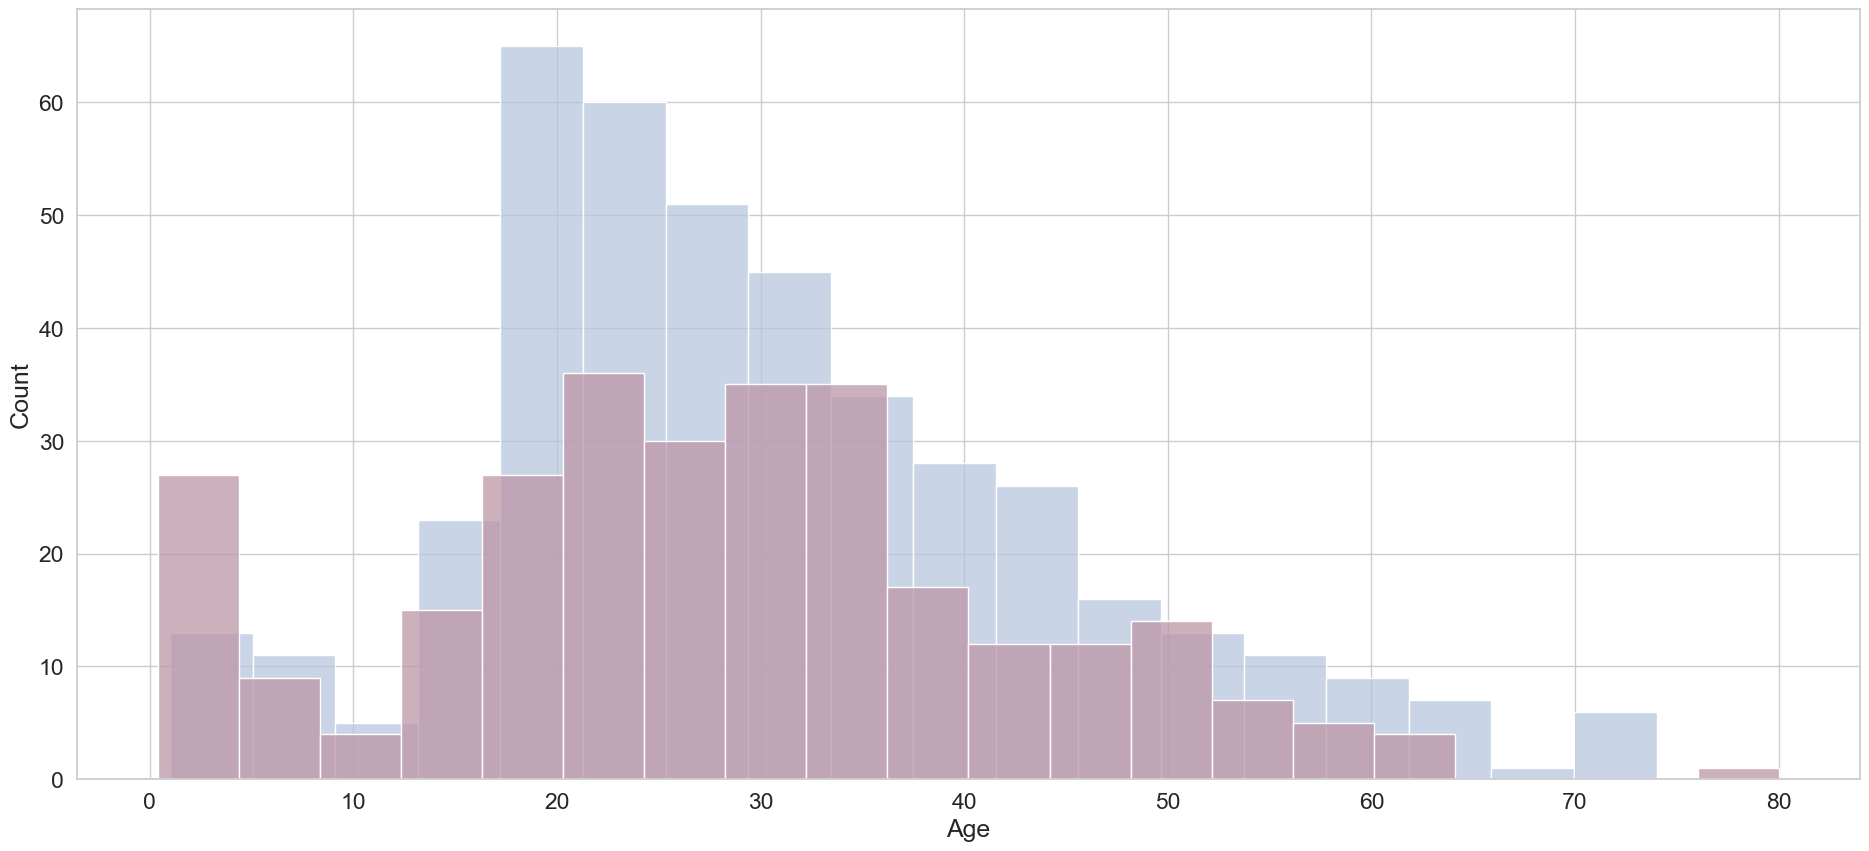

In [11]:
data_surv_age = dataset.loc[dataset["Survived"] == 1, ["Age"]]
data_died_age = dataset.loc[dataset["Survived"] == 0, ["Age"]]
sns.set_style('whitegrid')

fig = plt.subplots( figsize=(23, 10))
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.histplot(data=data_died_age, x="Age", color='#b7c6df', binwidth=4)
sns.histplot(data=data_surv_age, x="Age",color='#bc96a6', binwidth=4)

plt.show()


Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?
1. Графік показує нам скільки людей загинуло в залежності від їхнього віку.
2. Графік показує нам скільки людей вижило в залежності від їхнього віку.
3. Графік показує нам скільки людей вижило і загинуло в залежності від їхнього віку.

Я вважаю, що цих візуалізацій недостатньо для висновків щодо розподілів та статистичних оцінок тому що в нас є ще багато факторів які вплинули на те чи загинули люди чи вижили. Ці графіки просто показують сметрність і кількість виживших в залежності від їхнього віку.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
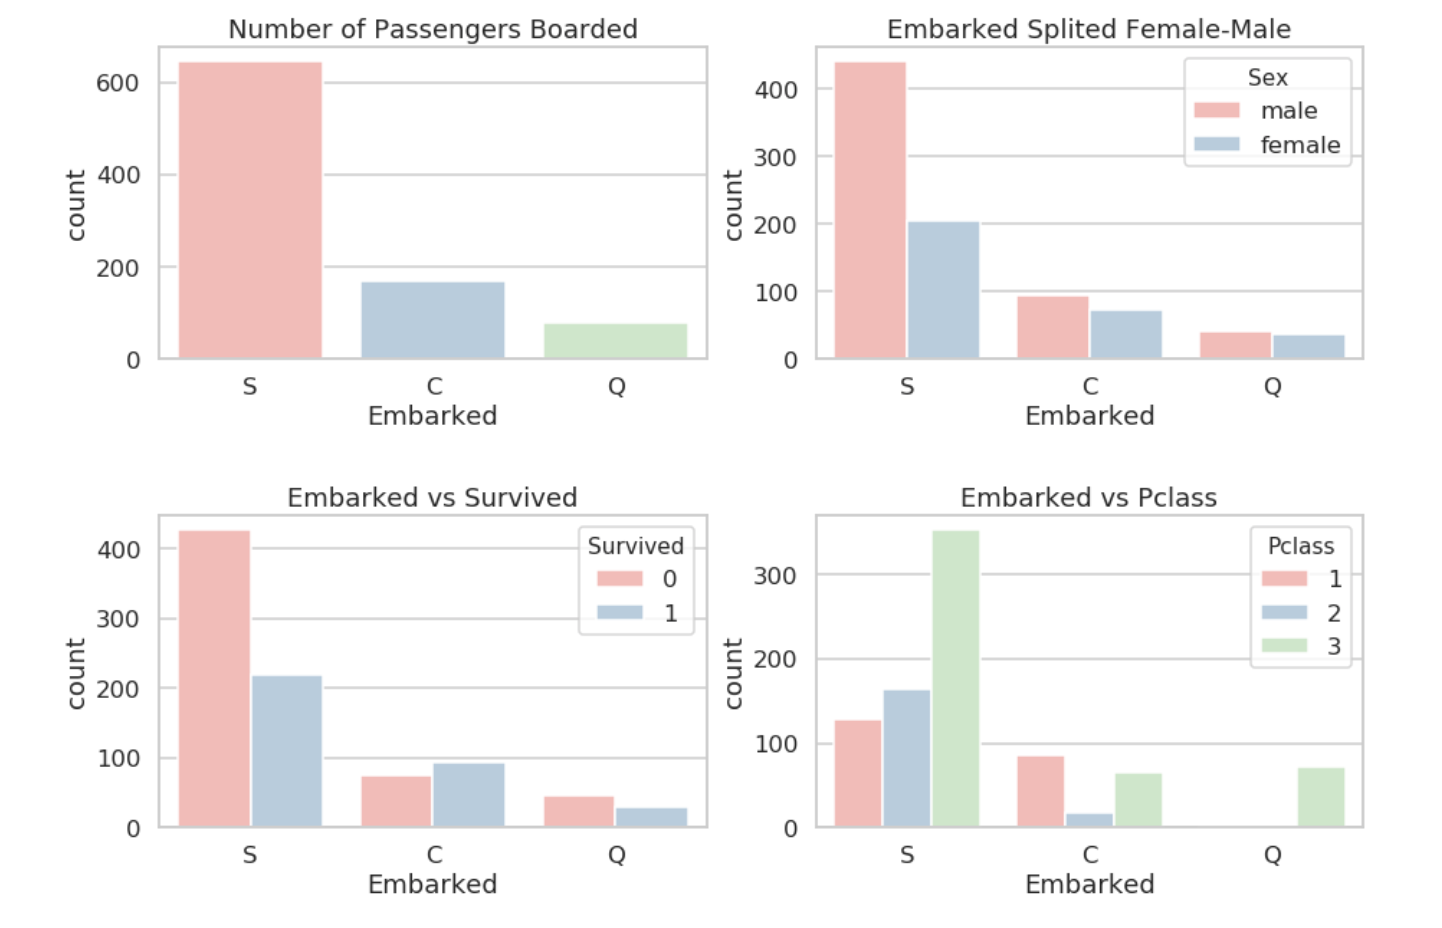

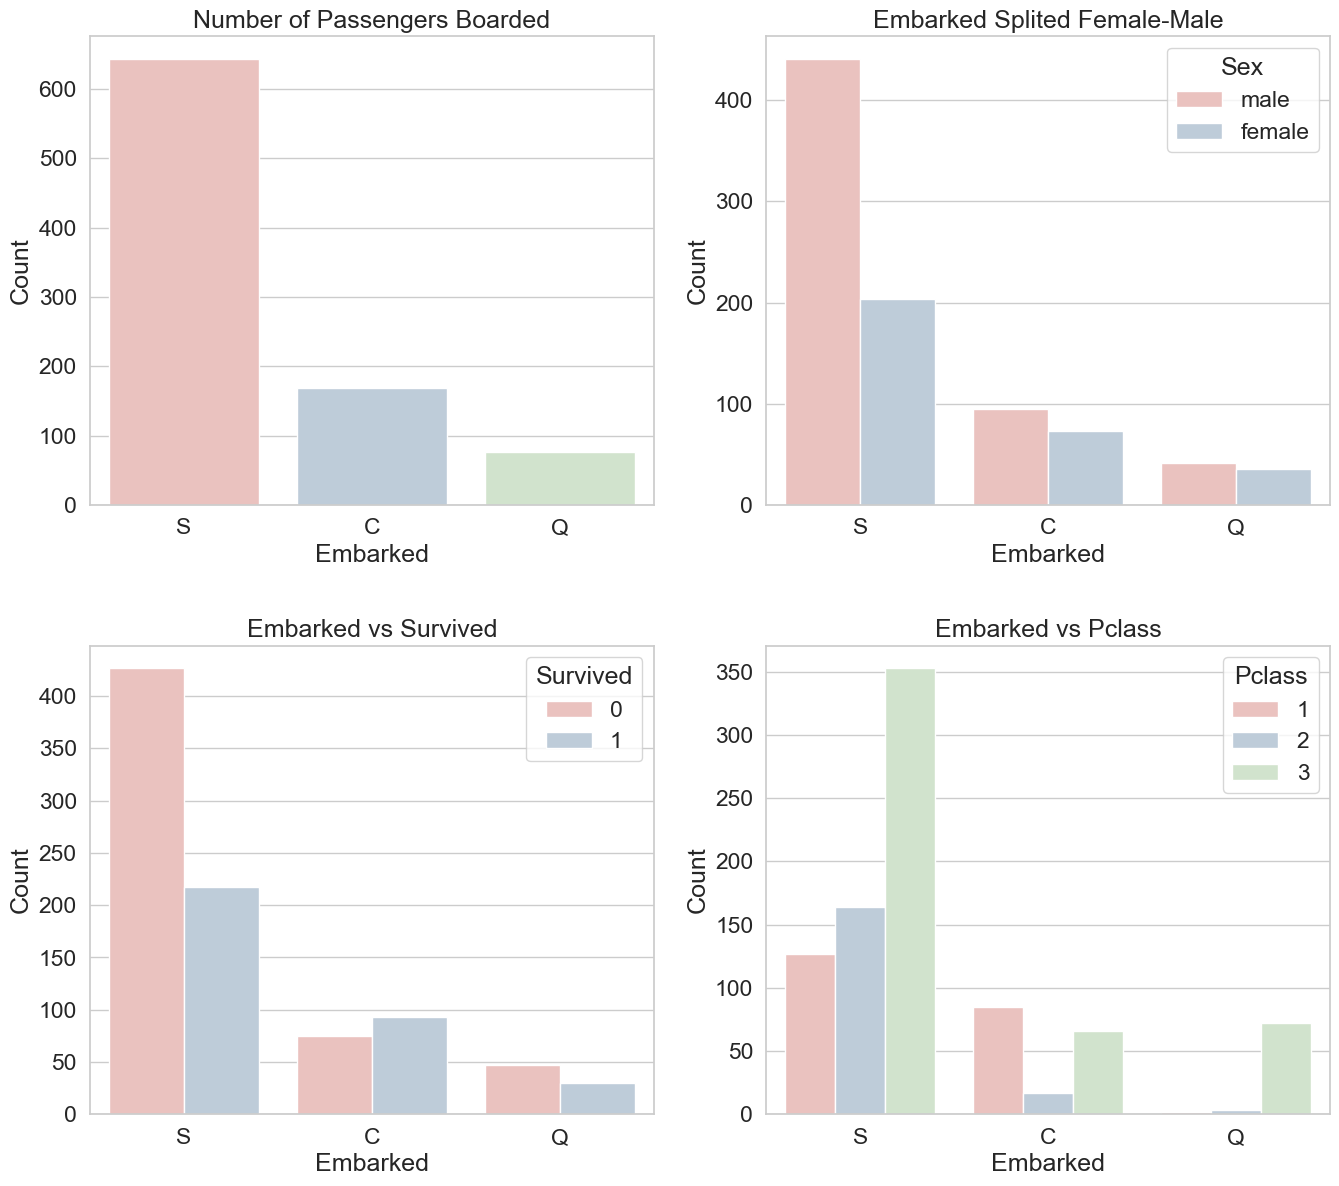

In [17]:
fig, ((ax_num_pas_board,ax_embark_splited),(ax_embark_vs_surv, ax_embark_vs_pclass)) = plt.subplots(2,2,figsize = (16,14))
plt.subplots_adjust(hspace=0.3)
sns.set_style('whitegrid')

data_embarked = dataset[["Embarked"]]
data_embarked_splited = dataset[["Embarked", "Sex"]]
data_embarked_survived = dataset[["Embarked", "Survived"]]
data_embarked_pclass = dataset[["Embarked", "Pclass"]]



embarked_count = data_embarked.value_counts()
data_embarked_count = pd.DataFrame({"Embarked": embarked_count.index.get_level_values("Embarked"), "Count": embarked_count.values})

sns.barplot(data = data_embarked_count, x = "Embarked", y = "Count", ax=ax_num_pas_board, palette=['#f1bcb8', '#b9ccdd', '#cfe6ca'], hue="Embarked")
ax_num_pas_board.set_title("Number of Passengers Boarded")


embarked_splited = data_embarked_splited.groupby("Embarked").value_counts().sort_values(ascending=False)
data_embarked_sex_count = pd.DataFrame({"Embarked": embarked_splited.index.get_level_values("Embarked"), "Sex": embarked_splited.index.get_level_values("Sex"), "Count": embarked_splited.values})

sns.barplot(data = data_embarked_sex_count, x = "Embarked", y = "Count", ax=ax_embark_splited, palette=['#f1bcb8', '#b9ccdd'], hue="Sex")
ax_embark_splited.set_title("Embarked Splited Female-Male")



embarked_surv_count = data_embarked_survived.groupby("Embarked").value_counts().sort_values(ascending=False)
data_embarked_surv_count = pd.DataFrame({"Embarked": embarked_surv_count.index.get_level_values("Embarked"), "Survived": embarked_surv_count.index.get_level_values("Survived"), "Count": embarked_surv_count.values})

sns.barplot(data = data_embarked_surv_count, x = "Embarked", y = "Count", ax=ax_embark_vs_surv, palette=['#f1bcb8', '#b9ccdd'], hue="Survived")
ax_embark_vs_surv.set_title("Embarked vs Survived")



embarked_pclass_count = data_embarked_pclass.groupby("Embarked").value_counts().sort_values(ascending=False)
data_embarked_pclass_count = pd.DataFrame({"Embarked": embarked_pclass_count.index.get_level_values("Embarked"), "Pclass": embarked_pclass_count.index.get_level_values("Pclass"), "Count": embarked_pclass_count.values})

sns.barplot(data = data_embarked_pclass_count, x = "Embarked", y = "Count", ax=ax_embark_vs_pclass, palette=['#f1bcb8', '#b9ccdd', '#cfe6ca'], hue="Pclass")
ax_embark_vs_pclass.set_title("Embarked vs Pclass")

plt.show()

1. На графіку ми бачимо просто кількість людей які сіли на титанік в певному порту
2. На графіку ми бачимо кількість жінок і чоловіків які сіли на титанік в певному порту
3. На графіку ми бачимо скільки людей загалом загинули або вижили на титаніку в залежності в якому порту вони сіли на корабель
4. На графіку ми бачимо скільки людей з типом квитка 1,2 або 3 сіли на титанік в певному порту

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

C:\Users\user\AppData\Local\Temp\ipykernel_1772\842112990.py:25: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data=df_pclass_prices, x="Fare", ax=ax_pclass_all, palette=palette_color, bins=25, hue="Pclass")


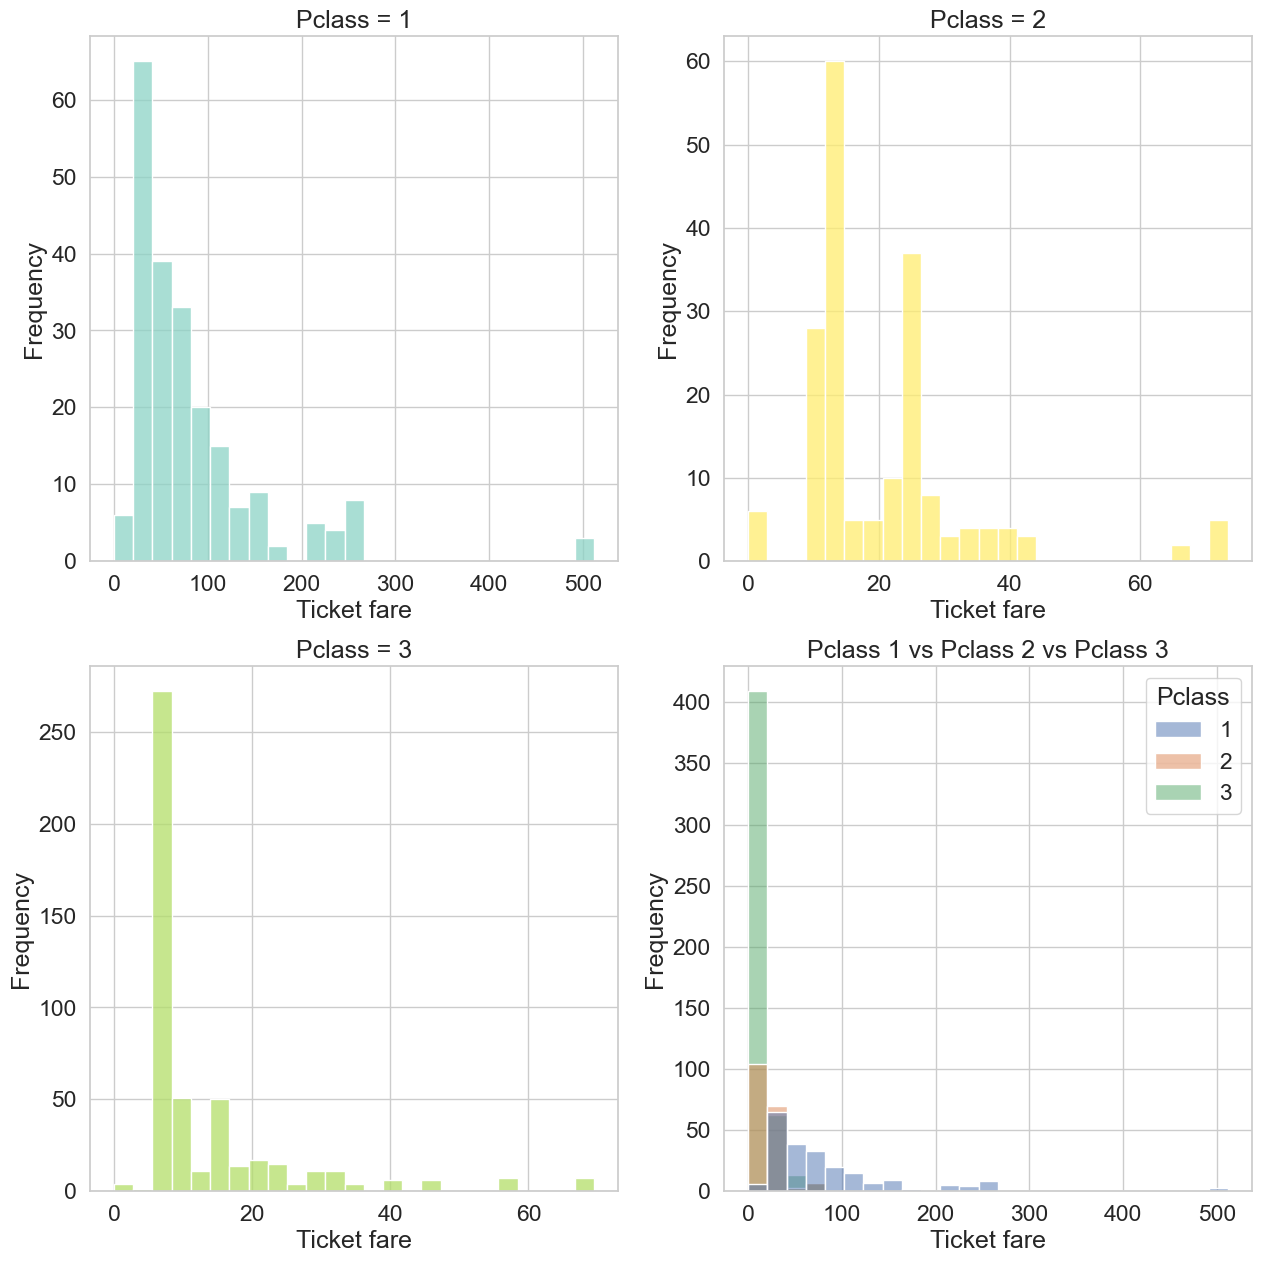

In [18]:
df_1_pclass_price = dataset.loc[dataset["Pclass"] == 1, ["Fare"]]
df_2_pclass_price = dataset.loc[dataset["Pclass"] == 2, ["Fare"]]
df_3_pclass_price = dataset.loc[dataset["Pclass"] == 3, ["Fare"]]
df_pclass_prices = dataset[["Pclass", "Fare"]]
sns.set_style('whitegrid')

fig, ((ax_pclass_one, ax_pclass_two), (ax_pclass_three, ax_pclass_all)) = plt.subplots(2, 2, figsize=(15, 15))


sns.histplot(data=df_1_pclass_price, x="Fare", ax=ax_pclass_one, color='#8dd3c6', bins=25)
ax_pclass_one.set_title("Pclass = 1")
ax_pclass_one.set_ylabel("Frequency")
ax_pclass_one.set_xlabel("Ticket fare")

sns.histplot(data=df_2_pclass_price, x="Fare", ax=ax_pclass_two, color='#ffed6f', bins=25)
ax_pclass_two.set_title("Pclass = 2")
ax_pclass_two.set_ylabel("Frequency")
ax_pclass_two.set_xlabel("Ticket fare")

sns.histplot(data=df_3_pclass_price, x="Fare", ax=ax_pclass_three, color='#b3de69', bins=25)
ax_pclass_three.set_title("Pclass = 3")
ax_pclass_three.set_ylabel("Frequency")
ax_pclass_three.set_xlabel("Ticket fare")

sns.histplot(data=df_pclass_prices, x="Fare", ax=ax_pclass_all, palette=palette_color, bins=25, hue="Pclass")
ax_pclass_all.set_title("Pclass 1 vs Pclass 2 vs Pclass 3")
ax_pclass_all.set_ylabel("Frequency")
ax_pclass_all.set_xlabel("Ticket fare")

plt.show()


Прокоментуйте побудовані графіки
1. Графік показує всі вартості квитка 1 класу
2. Графік показує всі вартості квитка 2 класу
3. Графік показує всі вартості квитка 3 класу
4. Графік показуж всі вартості квитків 1,2 та 3 класу в порівнняні на одному графіку